In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df

C:\Users\Dimas Dwi A\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [3]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
#drop the column that has no data
df1 = df.drop(['annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m' ,'open_il_24m', 
   'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','inq_fi',
   'total_cu_tl','inq_last_12m'], axis = 1)

In [6]:
#check df1.info 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
df1.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [8]:
print("No of Columns : ", df1.shape[1])
print("No of Row : ", df1.shape[0])

No of Columns :  58
No of Row :  466285


# Explorasi Data Analysis dan Visualisasi

### Duplicates Checking

In [9]:
#check if there is duplication of data or not
df1.duplicated().sum()

0

### Missing Value Checking

In [10]:
#check missing value
df1.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [11]:
# check missing value with persentase
def chek_missing(df):
    sum_nan = df.isnull().sum().reset_index()
    sum_nan.columns = ['kolom', 'jumlah_NaN']
    sum_nan["persentase"] = sum_nan.jumlah_NaN/len(df)*100
    return sum_nan.sort_values("persentase", ascending =  False)
df_missing = chek_missing(df1)
df_missing

,kolom,jumlah_NaN,persentase
30,mths_since_last_record,403647,86.566585
51,mths_since_last_major_derog,367311,78.773926
20,desc,340302,72.981546
29,mths_since_last_delinq,250351,53.690554
48,next_pymnt_d,227214,48.728567
56,tot_cur_bal,70276,15.071469
55,tot_coll_amt,70276,15.071469
57,total_rev_hi_lim,70276,15.071469
11,emp_title,27588,5.916553
12,emp_length,21008,4.505399


Text(0.5, 1.0, 'Missing Value Comparison')

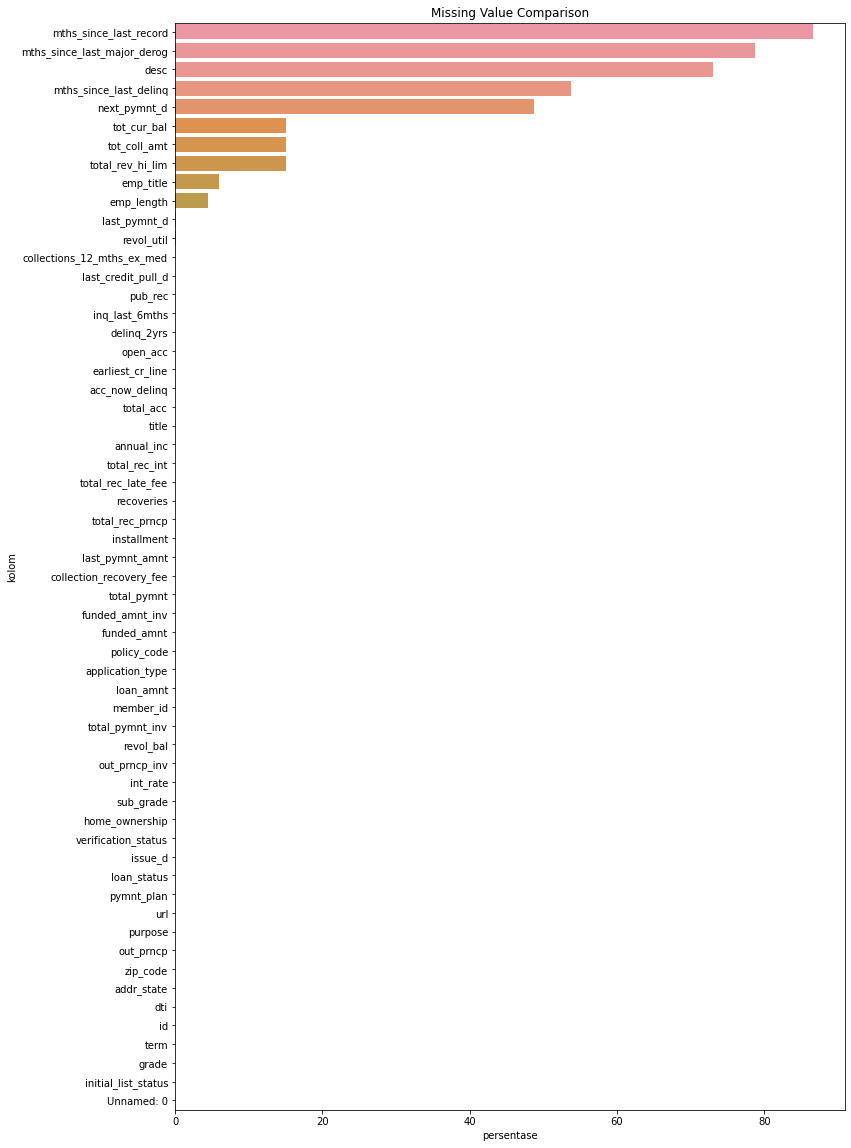

In [12]:
#missing value comparison
plt.figure(figsize=(12,20))
sns.barplot(y = df_missing['kolom'], x = df_missing['persentase']).set_title("Missing Value Comparison")

In [13]:
# check missing value more than 0.9
mis = df_missing[df_missing.persentase < 90]
mis 

,kolom,jumlah_NaN,persentase
30,mths_since_last_record,403647,86.566585
51,mths_since_last_major_derog,367311,78.773926
20,desc,340302,72.981546
29,mths_since_last_delinq,250351,53.690554
48,next_pymnt_d,227214,48.728567
56,tot_cur_bal,70276,15.071469
55,tot_coll_amt,70276,15.071469
57,total_rev_hi_lim,70276,15.071469
11,emp_title,27588,5.916553
12,emp_length,21008,4.505399


In [14]:
to_fix_col = mis[mis.persentase > 0].kolom.tolist()
to_fix_col

['mths_since_last_record',
 'mths_since_last_major_derog',
 'desc',
 'mths_since_last_delinq',
 'next_pymnt_d',
 'tot_cur_bal',
 'tot_coll_amt',
 'total_rev_hi_lim',
 'emp_title',
 'emp_length',
 'last_pymnt_d',
 'revol_util',
 'collections_12_mths_ex_med',
 'last_credit_pull_d',
 'pub_rec',
 'inq_last_6mths',
 'delinq_2yrs',
 'open_acc',
 'earliest_cr_line',
 'acc_now_delinq',
 'total_acc',
 'title',
 'annual_inc']

In [15]:
df2 = df1.drop(df_missing[df_missing.persentase > 90].kolom.tolist())
to_fix = df2[df2[to_fix_col].describe().columns.tolist()]
df2

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0


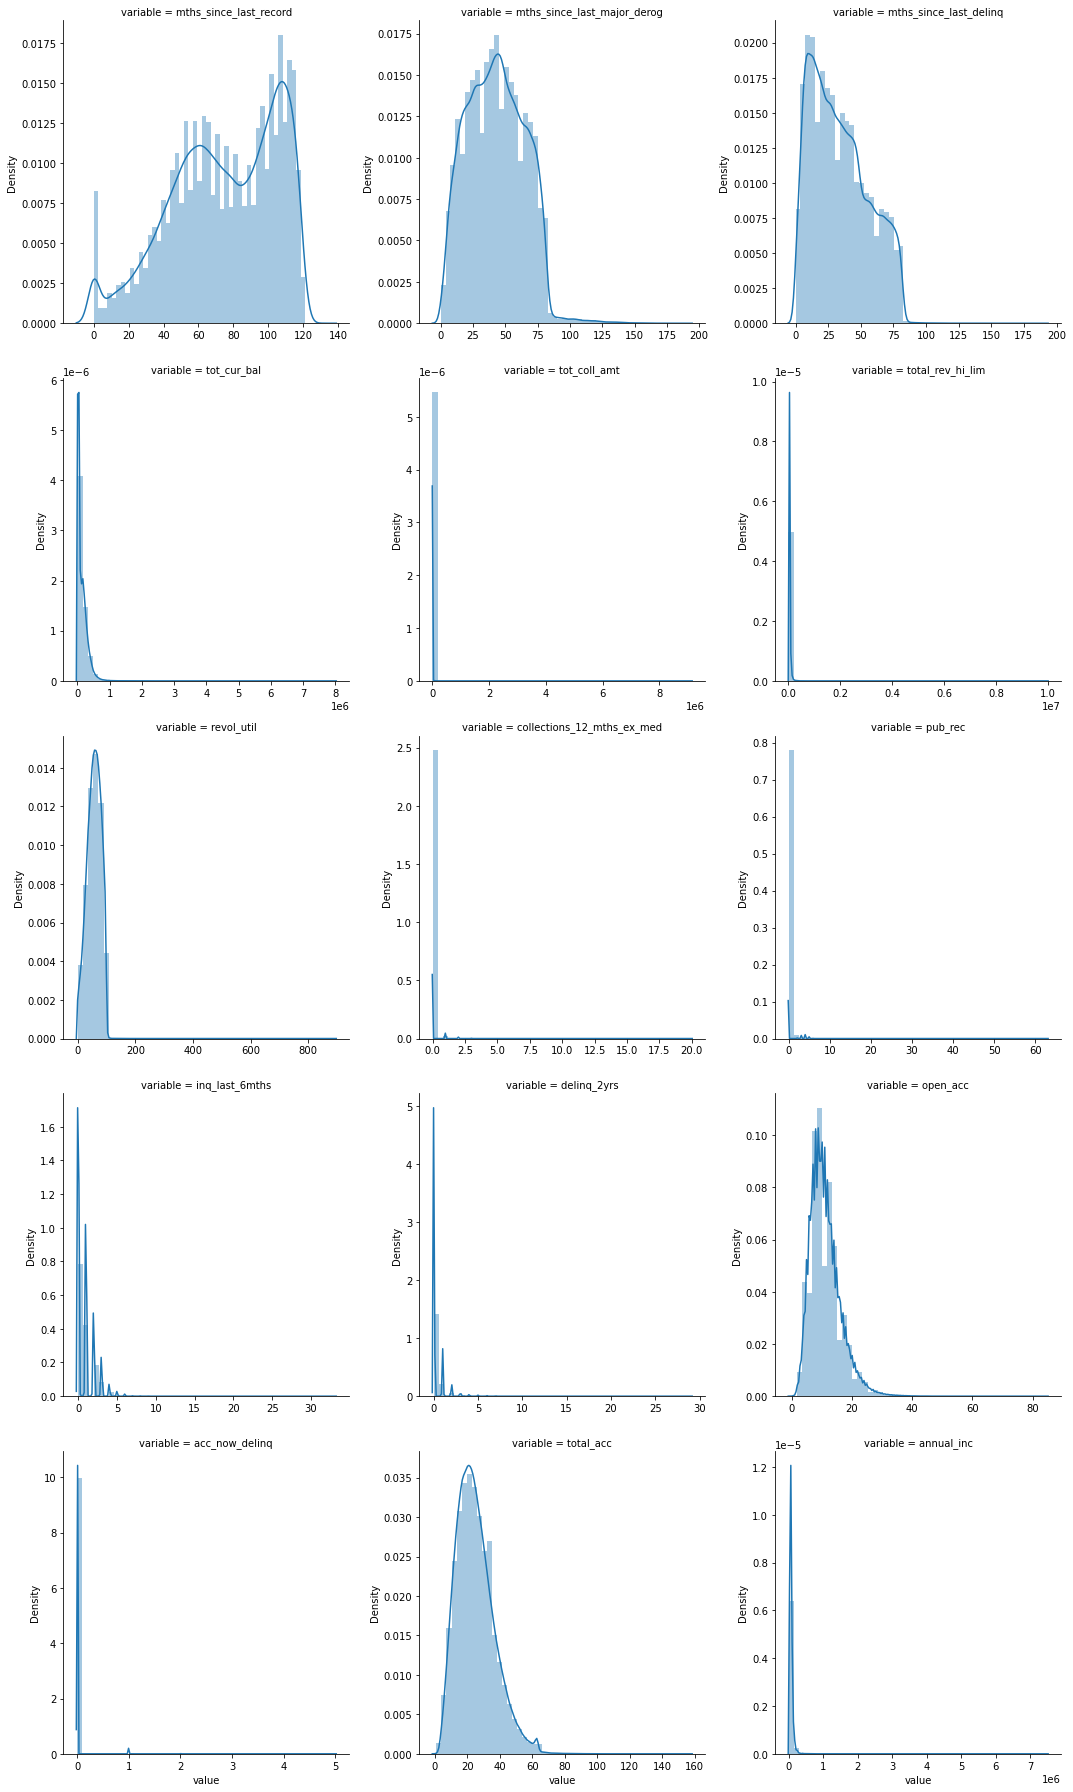

In [16]:
# function visualisasi facetgrid
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, 
                      sharex=False, sharey=False, size = 5)
    g = g.map(types, "value")
    plt.show()
    return (g)
import warnings
warnings.filterwarnings('ignore')
viz(to_fix, sns.distplot)

In [17]:
df2[['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq','tot_cur_bal','tot_coll_amt','total_rev_hi_lim']] = df2[['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq','tot_cur_bal','tot_coll_amt','total_rev_hi_lim']].fillna(df2[['mths_since_last_record','mths_since_last_major_derog','mths_since_last_delinq','tot_cur_bal','tot_coll_amt','total_rev_hi_lim']].mean())
df2.fillna('Unknown', inplace = True)

In [18]:
#cek ulang missing value
chek_missing(df2)

,kolom,jumlah_NaN,persentase
0,Unnamed: 0,0,0.0
43,total_rec_late_fee,0,0.0
31,open_acc,0,0.0
32,pub_rec,0,0.0
33,revol_bal,0,0.0
34,revol_util,0,0.0
35,total_acc,0,0.0
36,initial_list_status,0,0.0
37,out_prncp,0,0.0
38,out_prncp_inv,0,0.0


### Feature Engineering

In [19]:
#create Feature Engineering
df3 = df2[['loan_amnt','home_ownership','term','int_rate','installment','grade','emp_title','annual_inc','dti',
                'revol_bal','total_pymnt','pymnt_plan','purpose','loan_status']]

In [20]:
# penjelasan dict
dicts = {'Fully Paid':"Very Good",'Current': "Very Good",'Late (16-30 days)':"Good", 'Does not meet the credit policy. Status:Fully Paid':"Good",'Default':"Average",'Late (31-120 days)':"Average",
         'In Grace Period': "Bad" ,'Charged Off':"Bad" ,'Does not meet the credit policy. Status:Charged Off':"Very Bad"}
# convert to dicts
df3['loan_status_desc'] = df3['loan_status'].replace(dicts)

In [21]:
df3['loan_status_desc'].unique()

array(['Very Good', 'Bad', 'Average', 'Good', 'Very Bad'], dtype=object)

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         466285 non-null  int64  
 1   home_ownership    466285 non-null  object 
 2   term              466285 non-null  object 
 3   int_rate          466285 non-null  float64
 4   installment       466285 non-null  float64
 5   grade             466285 non-null  object 
 6   emp_title         466285 non-null  object 
 7   annual_inc        466285 non-null  object 
 8   dti               466285 non-null  float64
 9   revol_bal         466285 non-null  int64  
 10  total_pymnt       466285 non-null  float64
 11  pymnt_plan        466285 non-null  object 
 12  purpose           466285 non-null  object 
 13  loan_status       466285 non-null  object 
 14  loan_status_desc  466285 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 56.9+ MB


# Business insight

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

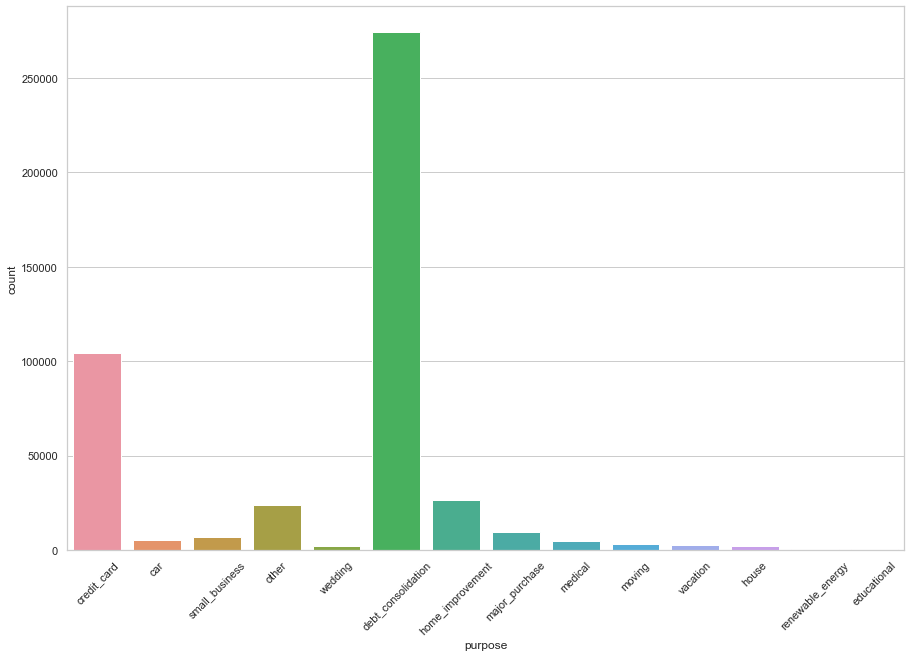

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.countplot(x="purpose", data= df2)
plt.xticks(rotation=45)

In [24]:
loan = df2[['purpose', 'loan_amnt']]
loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [25]:
loan.groupby('purpose').agg('mean')

,loan_amnt
purpose,
car,8122.063183
credit_card,14738.591981
debt_consolidation,15129.763307
educational,6626.540284
home_improvement,13911.130685
house,14959.960335
major_purchase,10494.243488
medical,8851.222295
moving,7550.033400


In [26]:
rate_loan = loan.groupby('purpose').agg('mean').reset_index()
rate_loan

,purpose,loan_amnt
0,car,8122.063183
1,credit_card,14738.591981
2,debt_consolidation,15129.763307
3,educational,6626.540284
4,home_improvement,13911.130685
5,house,14959.960335
6,major_purchase,10494.243488
7,medical,8851.222295
8,moving,7550.033400
9,other,9519.835374


In [27]:
# def barplot comparison
def barplot_value(x, y, title):
    chart = sns.barplot(x, y, ci = None)
    chart.set_title(title)
    plt.xticks(rotation= 90)
    for p in chart.patches:
        chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
    return chart 

<AxesSubplot:title={'center':'Comparison Loan Amount \nby Purpose'}, xlabel='purpose', ylabel='loan_amnt'>

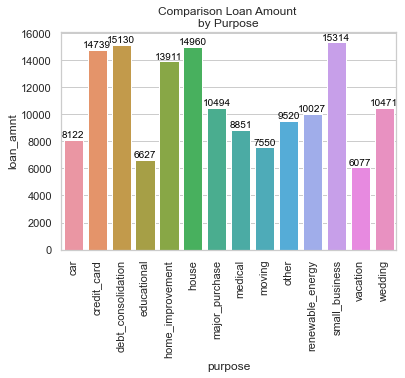

In [28]:
barplot_value(rate_loan.purpose, rate_loan.loan_amnt, "Comparison Loan Amount \nby Purpose")

# Data Pre-Processing

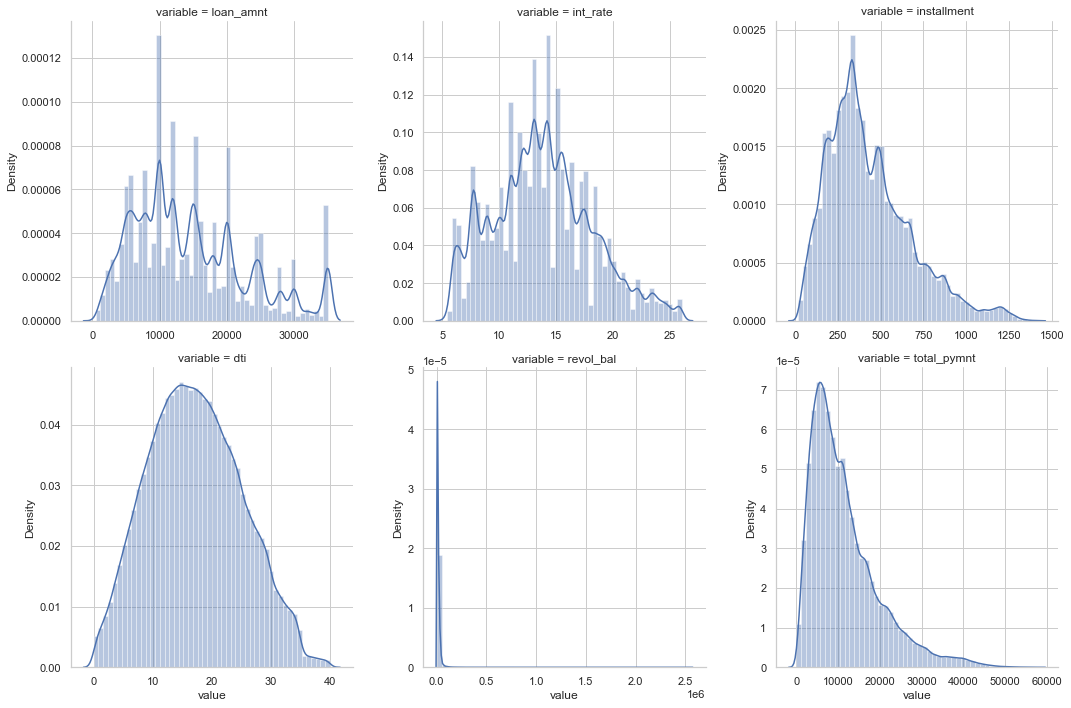

In [29]:
#plots distribution
viz(df3[['loan_amnt','int_rate','installment','dti','revol_bal','total_pymnt']], sns.distplot)

In [30]:
#skew report
skew_report = df3.skew().reset_index()
skew_report.columns = ['columns','skew_score']
skew_report.sort_values('skew_score',ascending = False)

,columns,skew_score
4,revol_bal,19.476291
5,total_pymnt,1.406403
2,installment,0.949293
0,loan_amnt,0.730980
1,int_rate,0.334938
3,dti,0.188283


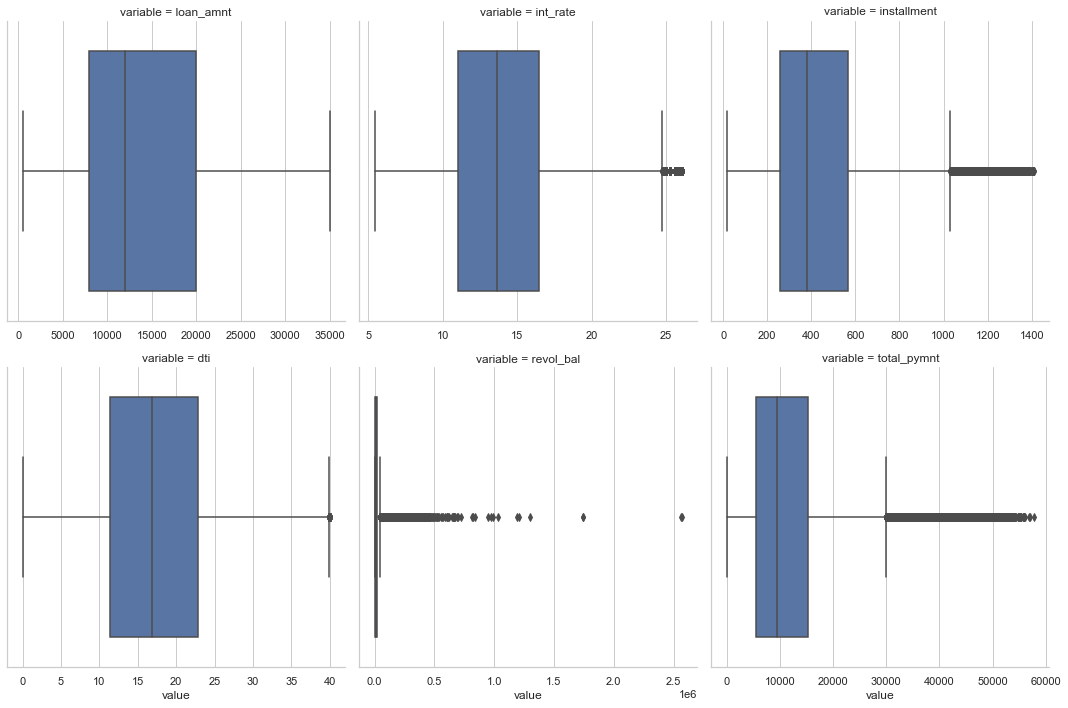

In [31]:
#plots outliers
viz(df3[['loan_amnt','int_rate','installment','dti','revol_bal','total_pymnt']], sns.boxplot)

In [32]:
# outliers report
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [33]:
# mencari outliers details
for i in df3[['loan_amnt','int_rate','installment','dti','revol_bal','total_pymnt']]:
  print(i,'\n', display(outliers(df[i])))

,sub,values
0,IQR,12000.0
1,Upper Bound,38000.0
2,Lower Bound,-10000.0
3,Sum outliers,0.0
4,percentage outliers,0.0


loan_amnt 
 None


,sub,values
0,IQR,5.500000
1,Upper Bound,24.740000
2,Lower Bound,2.740000
3,Sum outliers,4904.000000
4,percentage outliers,1.051717


int_rate 
 None


,sub,values
0,IQR,309.890000
1,Upper Bound,1031.415000
2,Lower Bound,-208.145000
3,Sum outliers,11711.000000
4,percentage outliers,2.511554


installment 
 None


,sub,values
0,IQR,11.420000
1,Upper Bound,39.910000
2,Lower Bound,-5.770000
3,Sum outliers,43.000000
4,percentage outliers,0.009222


dti 
 None


,sub,values
0,IQR,13920.000000
1,Upper Bound,41213.000000
2,Lower Bound,-14467.000000
3,Sum outliers,22879.000000
4,percentage outliers,4.906656


revol_bal 
 None


,sub,values
0,IQR,9756.033111
1,Upper Bound,29942.208127
2,Lower Bound,-9081.924318
3,Sum outliers,19039.000000
4,percentage outliers,4.083125


total_pymnt 
 None


<AxesSubplot:xlabel='loan_status_desc', ylabel='count'>

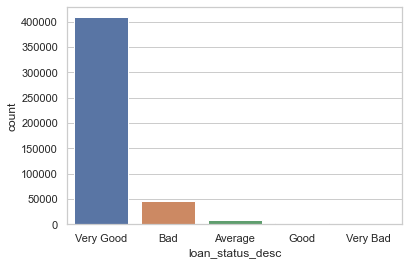

In [34]:
#Distribusi analysis
sns.countplot(data = df3 , x = 'loan_status_desc')

In [35]:
def corr_plot(df2, metode):
  plt.figure(figsize=(30,15))
  triangle = np.triu(np.ones_like(df2.corr(method = metode)))
  heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True, mask = triangle)
  heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12)
  return heatmap

<AxesSubplot:title={'center':'Correlation Heatmap'}>

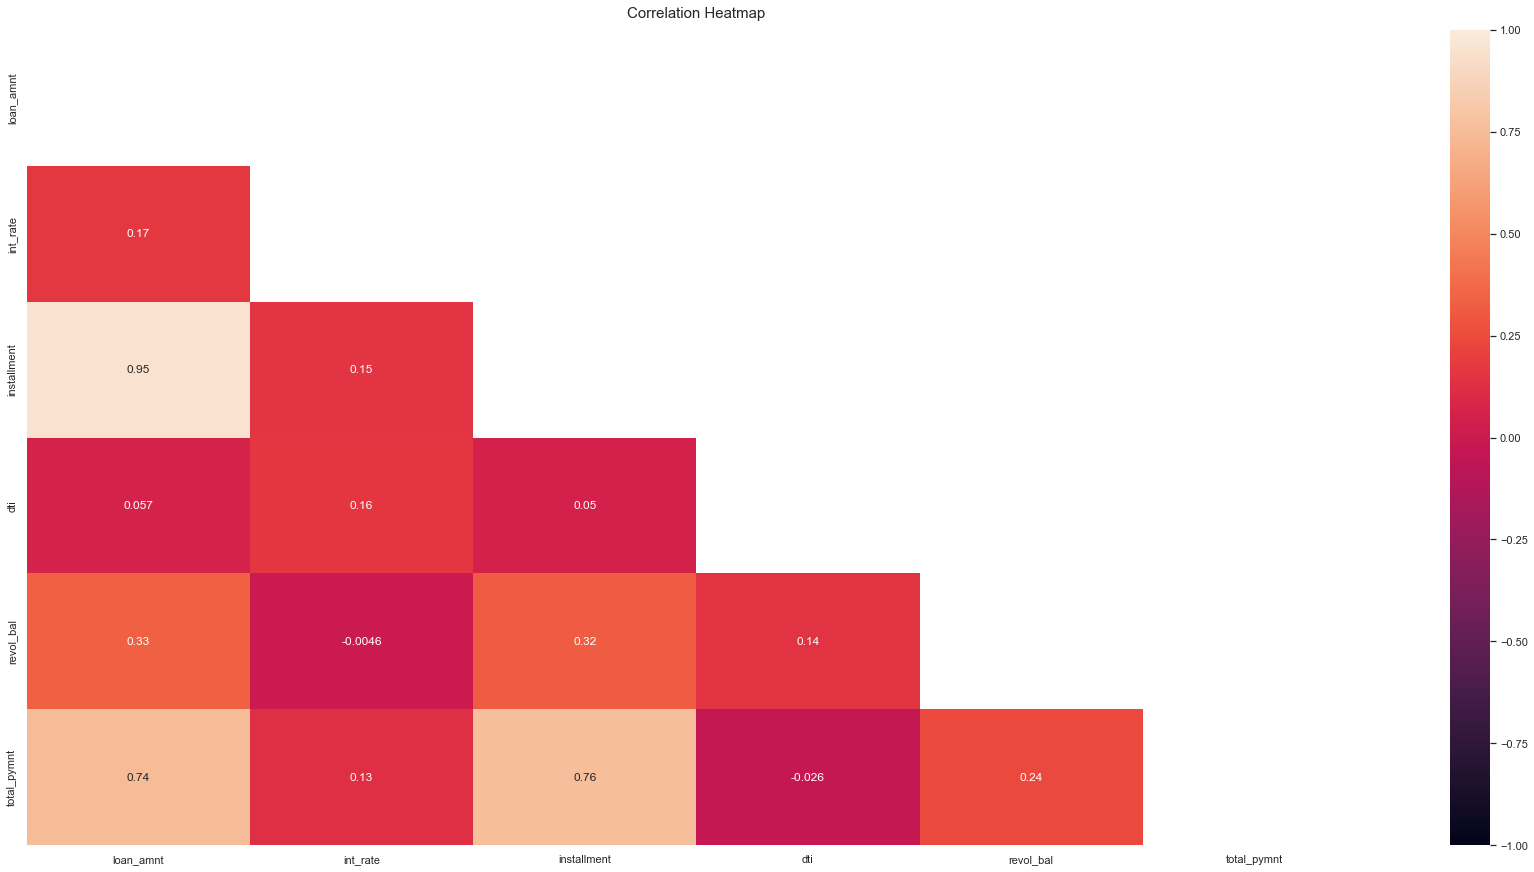

In [36]:
corr_plot(df3, "spearman")

In [37]:
# encoding categorical to see multicol
for i in df3[['home_ownership','term','grade','emp_title','annual_inc','pymnt_plan','purpose','loan_status','loan_status_desc']]:
  df3[i] = df3[i].astype('category').cat.codes

In [38]:
from scipy import stats
def t_test(df2, y):
  p_value = []
  colom = df2.columns.tolist()
  alpha = 0.05
  signifikan = []
  for i in df2:
    p_value.append(stats.ttest_ind(df2[i],y)[1])
    if stats.ttest_ind(df2[i],y)[1] <= alpha:
      signifikan.append('Signifikan')
    else:
      signifikan.append('Tidak Signifikan')
  df = pd.DataFrame()
  df['variabel'] = colom
  df['p-val'] = p_value
  df['signifikansi'] = signifikan
  return df

In [39]:
t_test(df3, df3.loan_status_desc)

,variabel,p-val,signifikansi
0,loan_amnt,0.0,Signifikan
1,home_ownership,0.0,Signifikan
2,term,0.0,Signifikan
3,int_rate,0.0,Signifikan
4,installment,0.0,Signifikan
5,grade,0.0,Signifikan
6,emp_title,0.0,Signifikan
7,annual_inc,0.0,Signifikan
8,dti,0.0,Signifikan
9,revol_bal,0.0,Signifikan


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [41]:
X = df3.drop('loan_status_desc',1)
vif = calc_vif(X)
vif = vif.sort_values('VIF', ascending=False)
vif['VIF'] = round(vif.VIF)
vif[vif.VIF < 10]

,variables,VIF
2,term,9.0
7,annual_inc,7.0
8,dti,6.0
6,emp_title,4.0
13,loan_status,4.0
1,home_ownership,3.0
12,purpose,2.0
9,revol_bal,2.0
11,pymnt_plan,1.0


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaling_column = ['dti','revol_bal']
df3[scaling_column] = scaler.fit_transform(df3[scaling_column])
print(df3[scaling_column].describe().T[['min','max']])

           min  max
dti        0.0  1.0
revol_bal  0.0  1.0


In [43]:
df3['loan_status_desc'].value_counts()

4    408965
1     45621
0      7732
2      3206
3       761
Name: loan_status_desc, dtype: int64

# Modeling

In [44]:
X = df3.drop(['loan_status_desc','loan_amnt','installment','total_pymnt','grade','int_rate'], axis = 1)
y = df3['loan_status_desc']

In [45]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=100)
print('Sebelum Oversampling')
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Sebelum Oversampling
Training target statistics: Counter({4: 286272, 1: 31946, 0: 5413, 2: 2246, 3: 522})
Testing target statistics: Counter({4: 122693, 1: 13675, 0: 2319, 2: 960, 3: 239})


In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Call the classifier
model = GaussianNB()
# Fit the classifier to the training data  
model.fit(X_train, y_train)
#Training Model: Predict 
y_pred = model.predict(X_test)

In [47]:
#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 0.8771687413258006
Testing Accuracy : 0.8771785596843144


In [48]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print('Sesudah Oversampling')
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Sesudah Oversampling
Training target statistics: Counter({4: 286272, 1: 286272, 0: 286272, 3: 286272, 2: 286272})
Testing target statistics: Counter({4: 122693, 1: 13675, 0: 2319, 2: 960, 3: 239})


In [49]:
# Call the classifier
model = GaussianNB()
# Fit the classifier to the training data  
model.fit(X_res, y_res)
#Training Model: Predict 
y_pred = model.predict(X_test)

In [50]:
#Evaluate Model Performance
print('Training Accuracy :', model.score(X_res, y_res))  
print('Testing Accuracy :', model.score(X_test, y_test))

Training Accuracy : 0.5859399452269171
Testing Accuracy : 0.12650300959352614


## Hyperparameter Tuning with Gaussian Naive Bayes  

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as Sns
import scipy.stats as stat
sns.set_style("whitegrid")
%matplotlib inline

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")

In [54]:
cols = X_train.columns
X_train = pd.DataFrame(rep_0.fit_transform(X_test))
X_test = pd.DataFrame(rep_0.fit_transform(X_test))
X_train.columns = cols
X_test.columns = cols
X_train.head()

,home_ownership,term,emp_title,annual_inc,dti,revol_bal,pymnt_plan,purpose,loan_status
0,5.0,1.0,163570.0,1040.0,0.334334,0.001904,1.0,2.000000,5.0
1,4.0,1.0,195429.0,1263.0,0.489122,0.002060,1.0,2.000000,5.0
2,5.0,1.0,137953.0,9634.0,0.392098,0.006939,1.0,11.000000,5.0
3,5.0,1.0,88875.0,19523.0,0.442361,0.011083,1.0,2.000000,5.0
4,1.0,1.0,58680.0,10411.0,0.325831,0.001501,1.0,2.674835,1.0


In [55]:
#Predicting train and test accuracy
predict_res = model.fit(X_res, y_res).predict(X_res)

In [56]:
# Accuray Score on train dataset
accuracy_res = accuracy_score(y_res,predict_res)
print('accuracy_score on train dataset : ', accuracy_res)
# predict the target on the test dataset
predict_test = model.predict(X_test)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.5859399452269171
accuracy_score on test dataset :  0.04876828274452054


In [57]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [59]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [60]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [61]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8838339790972649


# Conclusion

Untuk Dataset yang rakamin sediakan yaitu data loan credit, dari dataset tersebut terdapat 75 kolom yang tersedia dari 75 kolom tersebut terdapat 17 kolom yang tidak mempunyai value data maka dari itu kolom yang digunakan hanya 57 kolom.
dari 57 kolom tersebut diambil 14 kolom untuk feature engineering, dari 14 kolom tersebut hanya 9 kolom yang dijadikan untuk pembuatan modeling machine learning, dengan kolom taget yaitu loan status (Multiclass) yang sudah diklasifikasikan.
dari dataset yang sudah disediakan oleh rakamin jenis algoritma yang saya gunakan itu adalah klasifikasi dengan menggunakan algoritma Gaussian Naive Bayes, dengan nilai testing accuracy 0.87 (sebelum oversampling) namun ketika sudah dioversampling dan juga mennggunakan hyperparameter tuning menjadi 0.88 testing accuracy